# How Occupation depend on Educational Qualification 

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler

**Read the data**

In [2]:
Salary_Data = pd.read_csv('SalaryData.csv')

In [19]:
Salary_Data.head()

,Education,Occupation,Salary,EduOccu
0,Doctorate,Adm-clerical,153197,Doctorate: Adm-clerical
1,Doctorate,Adm-clerical,115945,Doctorate: Adm-clerical
2,Doctorate,Adm-clerical,175935,Doctorate: Adm-clerical
3,Doctorate,Adm-clerical,220754,Doctorate: Adm-clerical
4,Doctorate,Sales,170769,Doctorate: Sales


In [20]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
 3   EduOccu     40 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [3]:
Salary_Data.shape

(40, 3)

In [22]:
Salary_Data.isnull().sum()

Education     0
Occupation    0
Salary        0
EduOccu       0
dtype: int64

In [24]:
Salary_Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.0,NaN,NaN,NaN,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0
EduOccu,40,11,Doctorate: Prof-specialty,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Salary_Data['Education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [6]:
Salary_Data['Occupation'].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

# 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

**Education**

H0: µ(Doctorate) = µ(Bachelors) = µ(HS-grad)

H1: Atleast one pair of population means are unequal

**Occupation**

H0: µ(Adm-clerical) = µ(Sales) = µ(Prof-specialty) = µ(Exec-managerial)

H1: Atleast one pair of population means are unequal

# 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
formula_Edu = 'Salary ~ C(Education)'
model = ols(formula_Edu, Salary_Data).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


**As we can see that P value is less than alpha, hence we reject the null hypothesis. We can say that at least one populations mean is not equal**

# 1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [8]:
formula_Occu='Salary ~ C(Occupation)'
model=ols(formula_Occu, Salary_Data).fit()
anova_table=anova_lm(model)
anova_table 

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


**As we can see that P value is greater than alpha, hence we fail to reject the null hypothesis. We can say that all populations means are equal**

# 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [9]:
# Here in Education data we reject the null hypothesis
# Find which class means are significanly different 
mcomp = MultiComparison(Salary_Data['Salary'], Salary_Data['Education'])
print(mcomp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


# 1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

In [10]:
formula = 'Salary ~ C(Education) +C(Occupation)'
model = ols(formula, Salary_Data).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


Both factors have low p-values(less than 0.05) so the mean of the Salary are not the same across both Education and Occupation is the more significant factor(lower P-value)

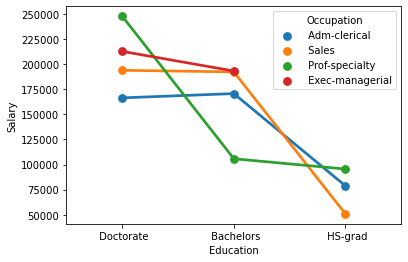

In [11]:
sns.pointplot(x='Education', y='Salary', data=Salary_Data, hue='Occupation',ci=None);

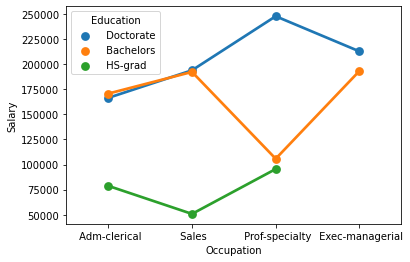

In [12]:
sns.pointplot(x='Occupation', y='Salary', data=Salary_Data, hue='Education',ci=None);

**we can see that there is some sort of interaction between the two treatments. so, we will introduce a new term while performing the two way ANOVA.**

# 1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

𝐻0 : The mean salary variable with respect to each education category and occupation is equal.

𝐻1 : At least one of the means of 'salary' variable with respect to each education category and occupation is unequal.

In [13]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
# formula = 'Days ~ C(Education) * C(Occupation)'
model = ols(formula, Salary_Data).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


As p value = 2.232500e-05 is lesser than 0.05, we reject the null hypothesis and this implies that there is significant amount of interaction between the variables, Education and Occupation and hence, at least one of the means of the salary variable with respect to each education category and occupation is unequal.

In [14]:
Salary_Data['EduOccu'] = Salary_Data['Education']+ ':' +Salary_Data['Occupation']

In [15]:
Salary_Data.tail()

,Education,Occupation,Salary,EduOccu
35,Bachelors,Exec-managerial,173935,Bachelors: Exec-managerial
36,Bachelors,Exec-managerial,212448,Bachelors: Exec-managerial
37,Bachelors,Exec-managerial,173664,Bachelors: Exec-managerial
38,Bachelors,Exec-managerial,212760,Bachelors: Exec-managerial
39,Doctorate,Exec-managerial,212781,Doctorate: Exec-managerial


In [16]:
Salary_Data['EduOccu'].value_counts()

 Doctorate: Prof-specialty     6
 Doctorate: Sales              5
 Doctorate: Adm-clerical       4
 Bachelors: Prof-specialty     4
 Bachelors: Sales              4
 Bachelors: Exec-managerial    4
 Bachelors: Adm-clerical       3
 HS-grad: Sales                3
 HS-grad: Adm-clerical         3
 HS-grad: Prof-specialty       3
 Doctorate: Exec-managerial    1
Name: EduOccu, dtype: int64

In [17]:
from statsmodels.stats.multicomp import MultiComparison

In [18]:
mcomp = MultiComparison(Salary_Data['Salary'], Salary_Data['EduOccu'])
print(mcomp.tukeyhsd().summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
           group1                      group2             meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------------------------------------------------
    Bachelors: Adm-clerical  Bachelors: Exec-managerial     22490.75    0.9  -48505.5887   93487.0887  False
    Bachelors: Adm-clerical   Bachelors: Prof-specialty    -64923.25 0.0963 -135919.5887    6073.0887  False
    Bachelors: Adm-clerical            Bachelors: Sales     21589.75    0.9  -49406.5887   92586.0887  False
    Bachelors: Adm-clerical     Doctorate: Adm-clerical     -4253.25    0.9  -75249.5887   66743.0887  False
    Bachelors: Adm-clerical  Doctorate: Exec-managerial      42070.0    0.9   -65266.375   149406.375  False
    Bachelors: Adm-clerical   Doctorate: Prof-specialty   77061.8333 0.0118   11331.9959  142791.6707   True
    Bachelors: Adm-